# Desafio Data Science Semantix

###### Endrew Rossin Pereira

### Imports

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap

import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

import random, math

Defino a Seed para deixar o trabalho determinístico

In [2]:
SEED = 99
random.seed(SEED)
np.random.seed(SEED)

### Load do dataset

Carrego os dados na memória

In [3]:
df = pd.read_csv('bank-full.csv', sep=';')

### Análise exploratória

Começo fazendo uma visualização inicial dos dados

In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Vejo as informações sobre quantos valores e o tipo de cada coluna 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Vejo quantos valores nulos existem nos dados

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Não há valores nulos

Faço uma visualização geral das variáveis numéricas para saber como estão as distribuições

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Uma coisa interessante é que a maioria das pessoas (pelo menos 75%) não haviam sido contactadas anteriormente

Faço uma visualização para entender melhor a distribuição dos empregos dos clientes

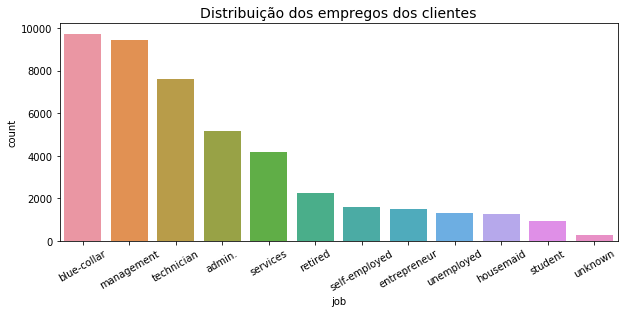

In [8]:
# Gero a figura definindo um tamanho e um título
plt.figure(figsize=(10,4))
plt.title('Distribuição dos empregos dos clientes', fontsize=14)

# Plot de contagem
sns.countplot('job', data=df, order=df.job.value_counts().index)

# Rotação da legenda em X
plt.xticks(rotation=30)

plt.show()

A maioria dos clientes do banco tem empregos "Blue-collar" e "Management". Poucos clientes tem o emprego desconhecido.

Também visualizo a distribuição do atributo do mês onde foi realizado o último contato com o cliente

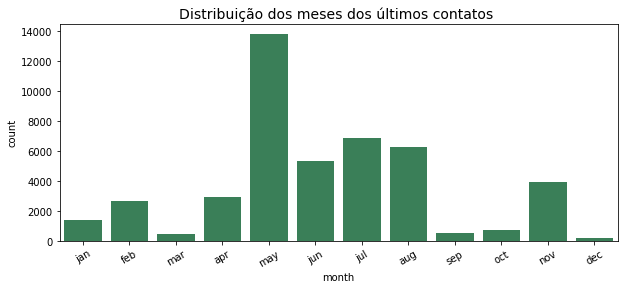

In [9]:
# Gero a figura definindo um tamanho e um título
plt.figure(figsize=(10,4))
plt.title('Distribuição dos meses dos últimos contatos ', fontsize=14)

# Plot de contagem (Ordenado pela sequência ordinal dos meses)
sns.countplot('month', data=df, color='seagreen',
             order = ['jan','feb','mar', 'apr','may', 'jun', 'jul', 'aug','sep','oct', 'nov', 'dec'])

# Rotação da legenda em X
plt.xticks(rotation=30)

plt.show()

O mês de maio é o mês onde foi realizado o maior número de últimos contatos, sendo dezembro o menor

Também visualizo a distribuição da escolaridade dos clientes

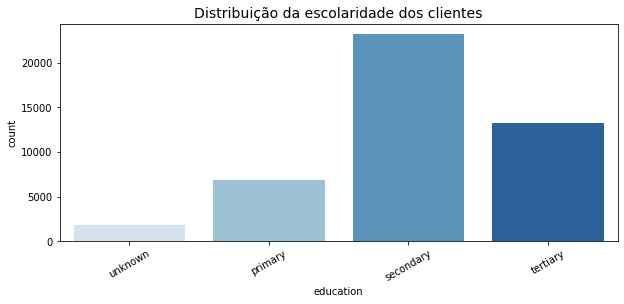

In [10]:
# Gero a figura definindo um tamanho e um título
plt.figure(figsize=(10,4))
plt.title('Distribuição da escolaridade dos clientes', fontsize=14)

# Plot de contagem (Ordenado pela sequência ordinal da educação)
sns.countplot('education', data=df, palette='Blues', order=['unknown','primary','secondary', 'tertiary'])

# Rotação da legenda em X
plt.xticks(rotation=30)

plt.show()

A maioria dos clientes tem o ensino médio completo, porém uma parcela significativa tem educação superior

Fiz vários plots para entender melhor também as distribuições das outras variáveis categóricas.

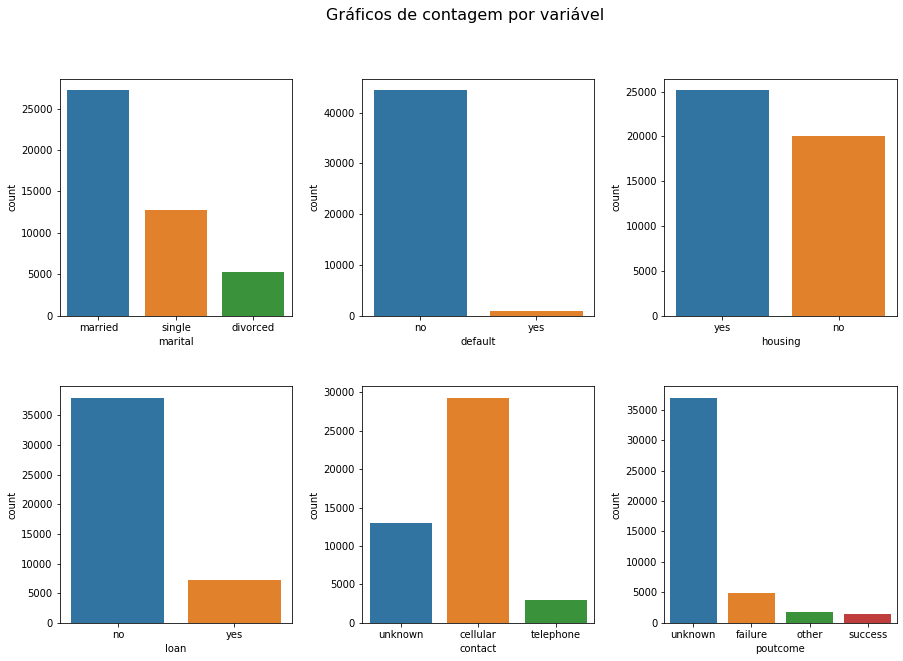

In [11]:
# Gero a figura e os subplots definindo um tamanho e um título
fig, axes = plt.subplots(figsize=(15, 10), ncols=3, nrows=2)
fig.suptitle('Gráficos de contagem por variável', fontsize=16)

# Faço os subplots
sns.countplot('marital', data=df, ax=axes[0,0])
sns.countplot('default', data=df, ax=axes[0,1])
sns.countplot('housing', data=df, ax=axes[0,2])
sns.countplot('loan', data=df, ax=axes[1,0])
sns.countplot('contact', data=df, ax=axes[1,1])
sns.countplot('poutcome', data=df, ax=axes[1,2])

# Ajusto o espaço entre os subplots
plt.subplots_adjust(wspace=0.3,hspace=0.3)

plt.show()

Olhando os plots, podemos observar que a maioria das pessoas são casadas, não tem falta de pagamentos nos empréstimos, tem empréstimos imobiliários, não tem empréstimos pessoais, foram contatadas pela campanha por meio do celular e não é conhecida a situação final da campanha anterior.

Também faço um plot para saber a distribuição dos resultados da campanha atual

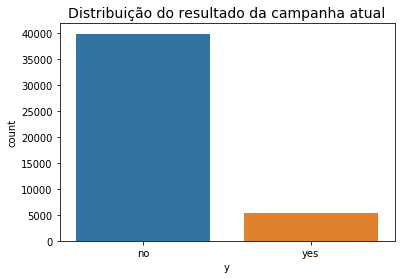

In [12]:
# Gero a figura definindo um tamanho e um título
plt.figure(figsize=(6,4))
plt.title('Distribuição do resultado da campanha atual', fontsize=14)

# Plot de contagem
sns.countplot('y', data=df)

plt.show()

Os resultados são desbalanceados, sendo o resultado negativo muito superior ao positivo

Para entender melhor como os atributos numéricos se relacionam, fiz uma matriz de correlação

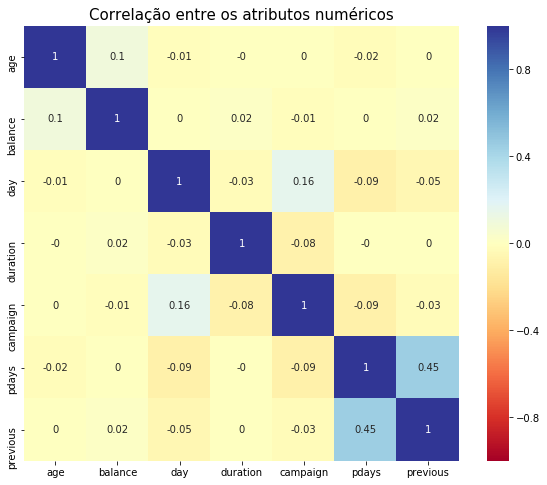

In [13]:
# Calculo a correlação entre os atributos e arredondo o resultado 
corrmat = round(df.corr(method='pearson'),2)

# Gero a figura definindo um tamanho e um título
plt.figure(figsize=(10,8))
plt.title('Correlação entre os atributos numéricos', fontsize=15)

# Plot de calor usando os valores calculados de correlação
sns.heatmap(corrmat, vmax=1.0, vmin=-1.0, square=True, annot=True, cmap='RdYlBu')

plt.show()

Os atributos "pdays" e "previous" tem uma correlação positiva média, e os atributos "campaign"e "day" tem uma correlação positiva leve

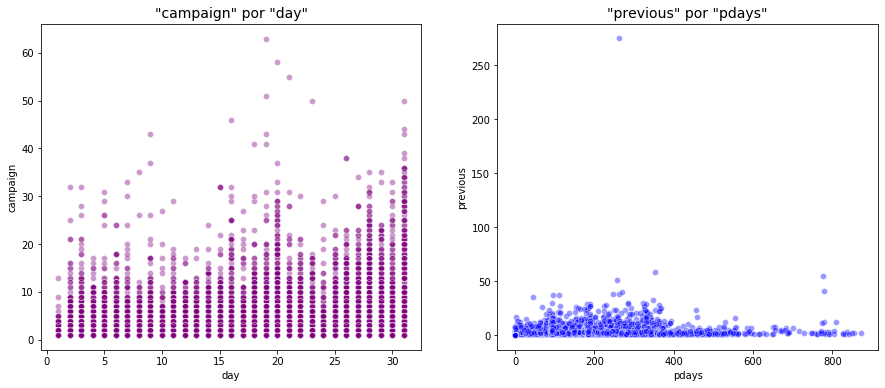

In [14]:
# Gero a figura e os subplots definindo um tamanho e um título
fig, axes = plt.subplots(figsize=(15, 6), ncols=2)

# Plots de espalhamento e título.
sns.scatterplot(x='day', y='campaign', data=df, alpha=0.4, color="purple", ax=axes[0])
axes[0].set_title('"campaign" por "day"', fontsize=14)
sns.scatterplot(x='pdays', y='previous', data=df, alpha=0.4, color="blue", ax=axes[1])
axes[1].set_title('"previous" por "pdays"', fontsize=14)

plt.show()

No plot da esquerda, parece que há uma leve tendência de que quanto mais perto do dia 30, maior o número de contatos realizados com o cliente. Já no plot da direita podemos ver que há um outlier, parece uma quantidade muito grande e fora do normal de contatos com um único cliente em campanhas anteriores. Vamos observar melhor esse plot.

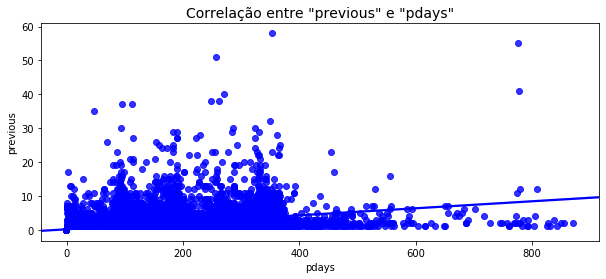

In [15]:
# Gero a figura definindo um tamanho e um título
plt.figure(figsize=(10,4))
plt.title('Correlação entre "previous" e "pdays"', fontsize=14)

# Plot de espalhamento com linha de regressão, removendo o outlier
sns.regplot(x='pdays', y='previous', data=df.loc[df.previous<100], color="blue")

plt.show()

Olhando para o plot com o outlier removido, há uma tendência de quanto maior o número de dias que passaram desde o último contato com o cliente, maior é o número de contatos realizados antes da campanha atual com este cliente

Vamos observar a distribuições dos atributos numéricos, para isso gerei um boxplot para cada atributo

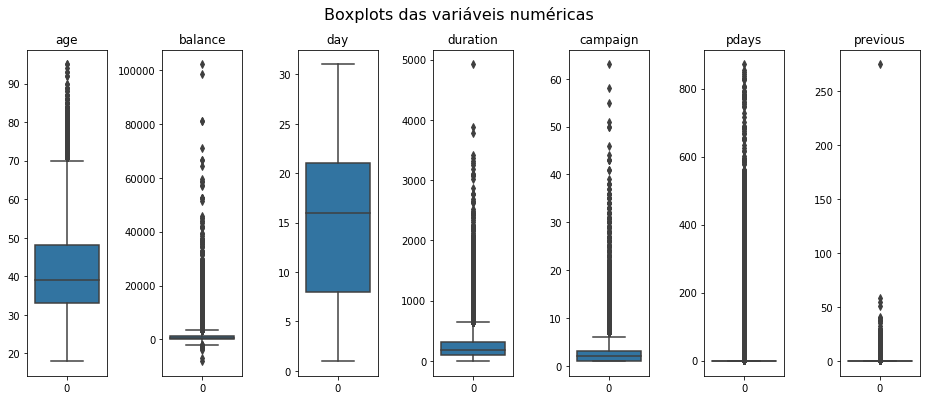

In [16]:
# Gero a figura e os subplots definindo um tamanho e um título
fig, axes = plt.subplots(figsize=(16, 6), ncols=7, nrows=1)
fig.suptitle('Boxplots das variáveis numéricas', fontsize=16)

# Crio os boxplots para cada atributo
sns.boxplot(data=df.age, ax=axes[0])
axes[0].set_title('age')
sns.boxplot(data=df.balance, ax=axes[1])
axes[1].set_title('balance')
sns.boxplot(data=df.day, ax=axes[2])
axes[2].set_title('day')
sns.boxplot(data=df.duration, ax=axes[3])
axes[3].set_title('duration')
sns.boxplot(data=df.campaign, ax=axes[4])
axes[4].set_title('campaign')
sns.boxplot(data=df.pdays, ax=axes[5])
axes[5].set_title('pdays')
sns.boxplot(data=df.previous, ax=axes[6])
axes[6].set_title('previous')

# Ajusto o espaço entre os subplots
plt.subplots_adjust(wspace=0.7,hspace=1)

plt.show()

Alguns atributos como balance, duration, campaign, pdays e previous tem muitos outliers. No caso específico do previous, como comentado anteriormente, há um outlier isolado muito diferente dos outros, talvez este seja um erro na coleta deste dado ou um cliente bastante específico.

Terminada a análise exploratória dos dados. Vou começar a responder as questões do teste.

# Questões do teste

###### 1.Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

Para responder esta pergunta, primeiro eu crio uma cópia do dataframe original para poder substituir os valores categóricos por valores numéricos

In [17]:
dfloan = df.copy()
dfloan.housing.replace(['no','yes'],[0,1],inplace=True)
dfloan.loan.replace(['no','yes'],[0,1],inplace=True)

Com os valores numéricos eu consigo calcular qual a porcentagem de cada profissão que tem empréstimos para cada tipo

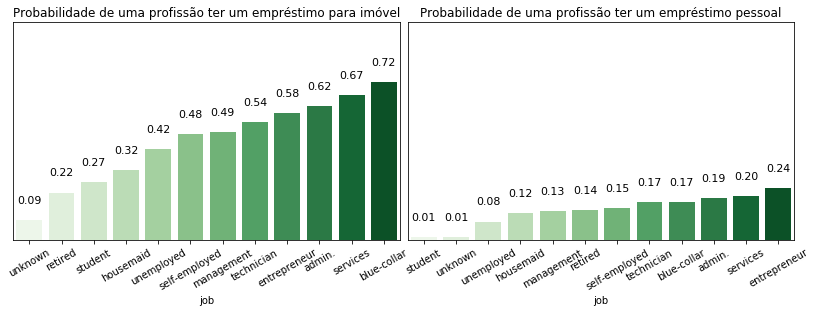

In [18]:
# Gero a figura e os subplots definindo um tamanho e um título
fig, axes = plt.subplots(figsize=(14, 4), ncols=2, sharey=True)

# Faço plots de barra, calculando a porcentagem
sns.barplot(x= dfloan.groupby('job').mean().index,
            y= 'housing',
            data= dfloan.groupby('job').mean(),
            palette= 'Greens',
            order= dfloan.groupby('job').mean().housing.sort_values().index,
            ax=axes[0])
axes[0].set(title='Probabilidade de uma profissão ter um empréstimo para imóvel', ylabel='')
axes[0].set_xticklabels(labels =dfloan.groupby('job').mean().housing.sort_values().index, rotation=30)
axes[0].set_yticks([])

axes[1].set_title('Probabilidade de uma profissão ter um empréstimo pessoal')
sns.barplot(x= dfloan.groupby('job').mean().index,
            y= 'loan',
            data= dfloan.groupby('job').mean(),
            palette= 'Greens',
            order= dfloan.groupby('job').mean().loan.sort_values().index,
            ax=axes[1])
axes[1].set_xticklabels(labels =dfloan.groupby('job').mean().loan.sort_values().index, rotation=30)
plt.ylabel('')

# Defino os limites da figura e os espaços
plt.ylim(0,1)
plt.subplots_adjust(wspace=0.02)

# Adiciono o valor de cada porcentagem em cima de cada barra correspondente
for i in range(2):
    for p in axes[i].patches:
            axes[i].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')

# Removo as linhas em volta da figura
axes[0].tick_params(top=False, bottom=True, left=False, right=False)

plt.show()

A profissão que tem mais tendencia a fazer um empréstimo é a profissão de "blue_collar", e do tipo imobiliário. Para os empréstimos do tipo pessoal, a profissão que mais faz empréstimos é a de empreendedor.

###### 2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?

Para responder esta questão podemos construir um modelo preditivo que prediz o resultado da campanha, e entender abrindo a "caixa preta" do modelo, como o atributo número de contatos influencia na decisão do modelo sobre o sucesso ou não da campanha. Para isso eu crio uma cópia do dataframe original

In [19]:
dfmodel = df.copy()

Eu decidi usar um modelo de Gradient boosting ([LightGBM](https://lightgbm.readthedocs.io/en/latest/)), pois é um modelo relativamente simples de implementar, que não demanda muito custo para as empresas e entrega um resultado eficiente. Para usar o modelo eu inicialmente transformo os valores das colunas categóricas em valores numéricos, depois eu transformo o tipo destes valores para "categoria", assim conseguindo indicar para o modelo quais atributos devem ser tratados como categóricos.

In [20]:
# Leio as colunas que tem tipo "object" e uso o labelEncoder para transformar os valores
for col in dfmodel.columns[dfmodel.dtypes == 'object']:
    le = LabelEncoder()
    le.fit(dfmodel[col])
    dfmodel[col] = le.transform(dfmodel[col])

# Defino quais são os atributos categóricos e transformo o seu tipo para "categoria"
category = ['job','marital','education','default','housing','loan','poutcome']
for col in category :
    dfmodel[col] = dfmodel[col].astype('category')

In [21]:
dfmodel.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


Agora eu separo os atributos em atributos preditivos e no que será predito (X e y). Escolhi predizer o sucesso da campanha pois é como saberemos como o número de contatos influencia esse resultado

In [22]:
X = dfmodel.drop(['y'], axis = 1)
y = dfmodel.y

Defino os hiperparâmetros que serão usados pelo modelo

In [23]:
lgb_params = {
                    'objective':'binary',
                    'metric':'auc',
                    'n_jobs':-1,
                    'learning_rate':0.05,
                    'num_leaves': 20,
                    'max_depth':-1,
                    'subsample':0.9,
                    'n_estimators':1500,
                    'seed': SEED,
                    'early_stopping_rounds':100, 
                }

Realizo o treino do modelo, utilizando a técnica de validação cruzada com Kfold, podendo assim saber se a métrica de avaliação do modelo está boa, mesmo sem ter dados específicos para validação ou teste. Escolhi a métrica de avaliação AUC pois para problemas de classificação com o alvo da predição desbalanceado, é uma métrica mais robusta que diz de forma mais assertiva a real qualidade do modelo.

In [24]:
# Esolho o numero de folds e crio uma variável para coletar o valor AUC de cada fold
K = 5
folds = KFold(K, shuffle = True, random_state = SEED)
best_scorecv= 0

# Faço a separação dos dados por folds, crio os dataframes de treino e de validação, treino o modelo e calculo a média do AUC.
for fold , (train_index,test_index) in enumerate(folds.split(X, y)):
    print('Fold:',fold+1)
          
    X_traincv, X_testcv = X.iloc[train_index], X.iloc[test_index]
    y_traincv, y_testcv = y.iloc[train_index], y.iloc[test_index]
    
    train_data = lgb.Dataset(X_traincv, y_traincv)
    val_data   = lgb.Dataset(X_testcv, y_testcv)
    
    LGBM = lgb.train(lgb_params, train_data, valid_sets=[train_data,val_data], verbose_eval=250)
    best_scorecv += LGBM.best_score['valid_1']['auc']

best_scorecv /= K
print('\n Mean AUC score:', best_scorecv)

Fold: 1
Training until validation scores don't improve for 100 rounds.
[250]	training's auc: 0.957283	valid_1's auc: 0.93624
Early stopping, best iteration is:
[393]	training's auc: 0.966581	valid_1's auc: 0.9374
Fold: 2
Training until validation scores don't improve for 100 rounds.
[250]	training's auc: 0.958868	valid_1's auc: 0.930043
Early stopping, best iteration is:
[244]	training's auc: 0.95848	valid_1's auc: 0.930177
Fold: 3
Training until validation scores don't improve for 100 rounds.
[250]	training's auc: 0.957688	valid_1's auc: 0.93589
Early stopping, best iteration is:
[307]	training's auc: 0.961427	valid_1's auc: 0.936193
Fold: 4
Training until validation scores don't improve for 100 rounds.
[250]	training's auc: 0.957496	valid_1's auc: 0.934931
Early stopping, best iteration is:
[267]	training's auc: 0.958685	valid_1's auc: 0.935161
Fold: 5
Training until validation scores don't improve for 100 rounds.
[250]	training's auc: 0.957421	valid_1's auc: 0.938851
Early stopping,

Com o modelo treinado, para explicar como o modelo chegou aos resultados, eu utilizo a biblioteca [SHAP](https://github.com/slundberg/shap) que é uma abordagem unificada para explicar a saída de qualquer modelo de machine learning.

In [25]:
# Dizendo para a biblíoteca qual modelo usar
explainer = shap.TreeExplainer(LGBM)
# Calculando os Shap values dos atributos X para este modelo
shap_values = explainer.shap_values(X)

O primeiro plot do SHAP que eu utilizo, mostra quanto de importância tem cada atributo para gerar a previsão. Quanto maior a barra, mais importante é o atributo para o modelo.

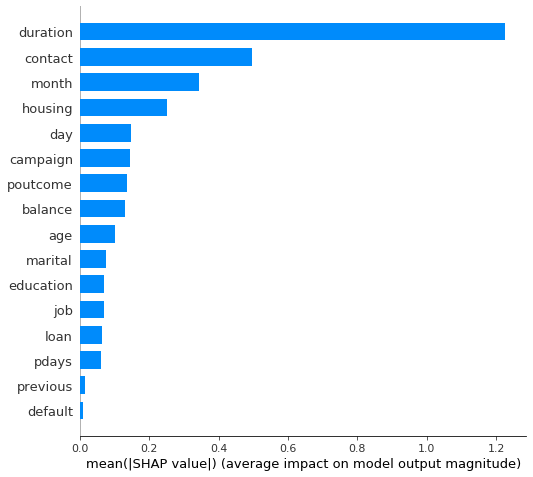

In [26]:
shap.summary_plot(shap_values[1], X, plot_type="bar")

O atributo mais importante para o modelo predizer se a campanha terá sucesso ou não, é o tempo de duração dos contatos.

Agora eu faço um plot muito interessante, que no eixo X mostra o quanto cada ponto dos atributos afetou na classificação final pelo modelo (Mais para a esquerda afetou para classificar como não ter sucesso na campanha e mais para a direita, para ter sucesso) e também mostra através das cores, se o valor daquele ponto para cada atributo é alto o baixo.

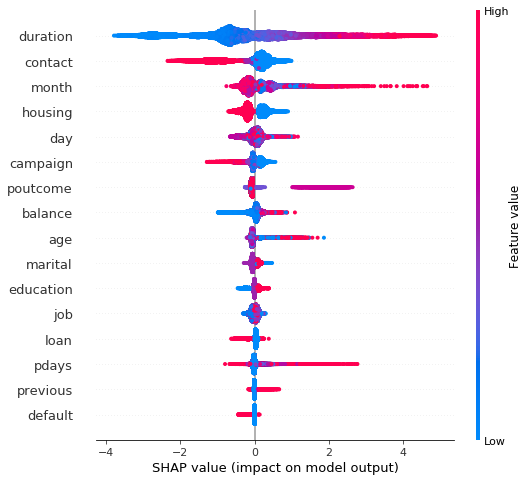

In [27]:
shap.summary_plot(shap_values[1], X)

Quanto maior o valor(vermelho) de campaign, mais o modelo tende a dizer que a previsão para este cliente vai ser de que ele não vai aceitar a proposta da campanha, e quanto menor o valor(azul), mais o modelo tende a dizer que a pessoa aceitará a oferta. Um ponto relevante a ser observado a partir destas informações é de que as pessoas que tendem a aceitar a oferta, fazem isso logo nos primeiros contatos. Talvez seja interessante para economizar recursos do departamento de marketing, direcionar os contatos apenas para pessoas que ainda não receberam nenhum ou receberam poucos contatos.

###### 3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

Para responder esta questão eu calculo a porcentagem de pessoas que aceitam a proposta para cada número de ligações que elas receberam.

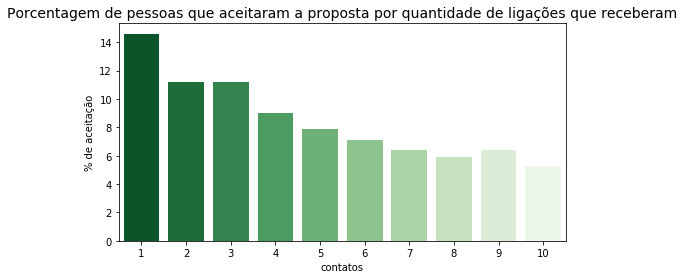

In [28]:
# Crio um dataframe vazio com as colunas e os índices
ligacoes = pd.DataFrame(index= range(1,11), columns=['contatos','porcent_sucesso'])

# Preencho o dataframe com os valores de contatos e a porcentagem de aceitação da oferta
for i in range(1,11):
    ligacoes['contatos'][i] = i
    ligacoes['porcent_sucesso'][i] = np.round((dfmodel.loc[dfmodel.campaign == i].y.mean() * 100),1)

# Gero a figura definindo um tamanho e um título
plt.figure(figsize=(8,4))
plt.title('Porcentagem de pessoas que aceitaram a proposta por quantidade de ligações que receberam', fontsize=14)

# Faço o barplot com os dados e defino a legenda em Y
sns.barplot(x='contatos', y='porcent_sucesso', data=ligacoes, palette='Greens_r')
plt.ylabel('% de aceitação')

plt.show()

Baseado na porcentagem de clientes que aceitam a proposta oferecida pela quantidade de ligações que foram recebidas pelos clientes, supondo que o custo de realizar um primeiro contato e os subsequentes seja o mesmo, o número médio e o número máximo de ligações que eu recomendo para otimizar a adesão é 1 ligação. Para cada 100 pessoas que receberem a ligação pela primeira vez, aproximadamente 14 aceitarão a proposta. Já na segunda vez que a ligação for realizada somente aproximadamente 11 aceitarão, fazendo assim com que não sejam captados 3 clientes a cada 100 segundos contatos.

###### 4. O resultado da campanha anterior tem relevância na campanha atual?

Decidi começar gerando uma visualização dos valores absolutos de qual tinha sido a decisão em relação a campanha anterior, para as pessoas que aceitaram a campanha atual e que não aceitaram

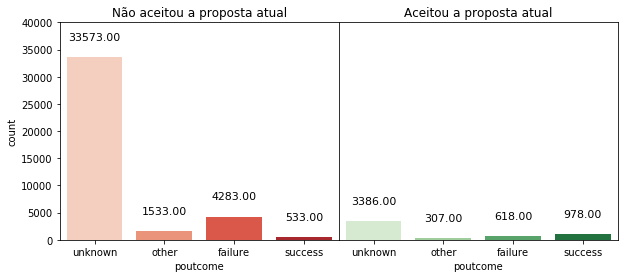

In [46]:
# Gero a figura e os subplots definindo um tamanho e um título
fig, axes = plt.subplots(figsize=(10, 4), ncols=2, sharey=True)

# Adiciono as linhas de valores no eixo Y do primeiro plot e faço o plot de contagem
sns.set_style({'ytick.left': True})
sns.countplot( x= df.loc[df.y=='no'].poutcome, palette= 'Reds', ax=axes[0],
             order = ['unknown','other','failure','success'])
axes[0].set_title('Não aceitou a proposta atual')

# Removo as linhas de valores no eixo Y do segundo plot e faço o plot de contagem
sns.set_style({'ytick.left': False})
sns.countplot( x= df.loc[df.y=='yes'].poutcome, palette='Greens', ax=axes[1],
             order = ['unknown','other','failure','success'])
axes[1].set_title('Aceitou a proposta atual')

#Removo a coluna Y do segundo plot, defino os limites em Y dos plots e removo os espaços entre os plots
plt.ylabel('')
plt.ylim(0,40000)
plt.subplots_adjust(wspace=0)

# Adiciono os valores em cima de cada barra correspondente
for i in range(2):
    for p in axes[i].patches:
            axes[i].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')

# Removo alguns ticks da imagem
axes[0].tick_params(top=False, bottom=True, left=True, right=False)

plt.show()

Para as pessoas que não aceitaram a proposta atual, visualmente podemos ver que a taxa de "failure" é maior do que a taxa de "success" da campanha anterior. Para as pessoas que aceitaram a campanha atual acontece o inverso. Isso é um indicativo de que o resultado da campanha anterior influencia na campanha atual. Para investigar melhor isso, vamos ver as porcentagens.

In [30]:
print('Porcentagem de pessoas que aceitaram a oferta anterior e aceitaram a oferta atual:',
      np.round(df.loc[df.y=='yes'].poutcome.value_counts().success / df.loc[df.y=='yes'].poutcome.value_counts().sum(),2)*100,
      '%')
print('Porcentagem de pessoas que recusaram a oferta anterior e aceitaram a oferta atual:',
      np.round(df.loc[df.y=='yes'].poutcome.value_counts().failure / df.loc[df.y=='yes'].poutcome.value_counts().sum(),2)*100,
      '%')
print('Porcentagem de pessoas que aceitaram a oferta anterior e recusaram a oferta atual:',
      np.round(df.loc[df.y=='no'].poutcome.value_counts().success / df.loc[df.y=='no'].poutcome.value_counts().sum(),2)*100,
      '%')
print('Porcentagem de pessoas que recusaram a oferta anterior e recusaram a oferta atual:',
      np.round(df.loc[df.y=='no'].poutcome.value_counts().failure / df.loc[df.y=='no'].poutcome.value_counts().sum(),2)*100,
      '%')

Porcentagem de pessoas que aceitaram a oferta anterior e aceitaram a oferta atual: 18.0 %
Porcentagem de pessoas que recusaram a oferta anterior e aceitaram a oferta atual: 12.0 %
Porcentagem de pessoas que aceitaram a oferta anterior e recusaram a oferta atual: 1.0 %
Porcentagem de pessoas que recusaram a oferta anterior e recusaram a oferta atual: 11.0 %


Pode-se dizer que o resultado da campanha anterior tem influência na campanha atual. Uma pessoa que aceitou a campanha anterior tem uma probabilidade de 18% de aceitar a campanha atual, enquanto a probabilidade de uma pessoa que recusou a campanha anterior é de 12% de aceitar a campanha atual.

###### 5. Qual o fator determinante para que o banco exija um seguro de crédito?

Podemos construir um modelo preditivo que prediz o "default" que é se o cliente tem algum crédito em inadimplência. Podemos entender com a biblioteca SHAP qual é o fator mais importante que o modelo considerou para determinar se o cliente é inadimplente ou não.

Separo os atributos em atributos preditivos e no que será predito (X e y)

In [31]:
X_default = dfmodel.drop(['default'], axis = 1)
y_default = dfmodel.default

Defino os hiperparâmetros que serão usados pelo modelo

In [32]:
lgb_params = {
                    'objective':'binary',
                    'metric':'auc',
                    'n_jobs':-1,
                    'learning_rate':0.05,
                    'num_leaves': 10,
                    'max_depth':-1,
                    'subsample':0.9,
                    'n_estimators':1500,
                    'seed': SEED,
                    'early_stopping_rounds':100, 
                } 

Realizo o treino do modelo, utilizando as mesmas técnicas do modelo anterior

In [33]:
K = 5
folds = KFold(K, shuffle = True, random_state = SEED)
best_scorecv= 0

for fold , (train_index,test_index) in enumerate(folds.split(X_default, y_default)):
    print('Fold:',fold+1)
          
    X_traincv, X_testcv = X_default.iloc[train_index], X_default.iloc[test_index]
    y_traincv, y_testcv = y_default.iloc[train_index], y_default.iloc[test_index]
    
    train_data = lgb.Dataset(X_traincv, y_traincv)
    val_data   = lgb.Dataset(X_testcv, y_testcv)
    
    LGBM = lgb.train(lgb_params, train_data, valid_sets=[train_data,val_data], verbose_eval=250)
    best_scorecv += LGBM.best_score['valid_1']['auc']

best_scorecv /= K
print('\n Mean AUC score:', best_scorecv)

Fold: 1
Training until validation scores don't improve for 100 rounds.
[250]	training's auc: 0.957509	valid_1's auc: 0.852632
Early stopping, best iteration is:
[277]	training's auc: 0.960356	valid_1's auc: 0.854308
Fold: 2
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[54]	training's auc: 0.915098	valid_1's auc: 0.875102
Fold: 3
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[64]	training's auc: 0.907214	valid_1's auc: 0.912053
Fold: 4
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[102]	training's auc: 0.931666	valid_1's auc: 0.88816
Fold: 5
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[63]	training's auc: 0.914834	valid_1's auc: 0.886996

 Mean AUC score: 0.8833238507057011


In [34]:
explainer = shap.TreeExplainer(LGBM)
shap_values = explainer.shap_values(X_default)

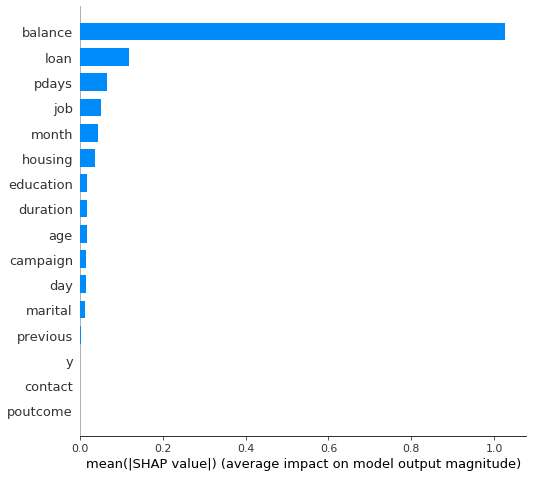

In [35]:
shap.summary_plot(shap_values[1], X_default, plot_type="bar")

Neste primeiro plot já percebemos que o fator determinante com grande vantagem para definir se o cliente é inadimplente é o balanço médio anual. O segundo fator mais importante é se ele possui empréstimo pessoal

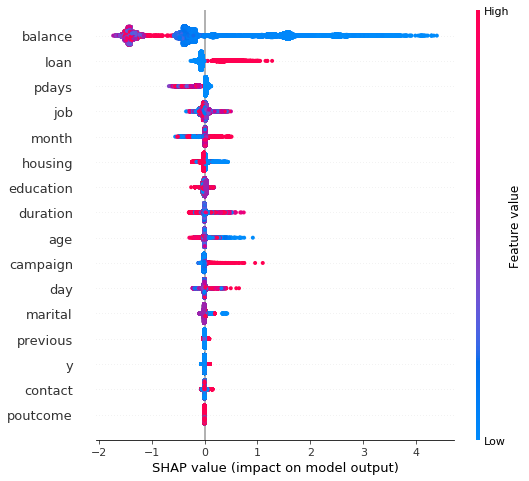

In [36]:
shap.summary_plot(shap_values[1], X_default)

Quanto mais baixo é o valor do atributo do balanço médio anual do cliente, mais o modelo tende a classificar este cliente como inadimplente, para empréstimo pessoal quando o valor é maior (1=Sim) o modelo também tende a classificar o cliente como inadimplente. Então podemos dizer que o fator determinante para que o banco exija um seguro de crédito ou não é a média do balanço anual do cliente, também devendo dar atenção se o cliente possui ou não empréstimo pessoal.

###### 6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

Podemos construir um modelo preditivo que prediz o "housing" que é se o cliente tem algum empréstimo imobiliário. Podemos entender com a biblioteca SHAP quais os fatores mais importantes que o modelo considerou para determinar se o cliente tem algum empréstimo imobiliário.

Separo os atributos em atributos preditivos e no que será predito (X e y)

In [37]:
X_housing = dfmodel.drop(['housing'], axis = 1)
y_housing = dfmodel.housing

Defino os hiperparâmetros que serão usados pelo modelo

In [38]:
lgb_params = {
                    'objective':'binary',
                    'metric':'auc',
                    'n_jobs':-1,
                    'learning_rate':0.05,
                    'num_leaves': 10,
                    'max_depth':-1,
                    'subsample':0.9,
                    'n_estimators':1500,
                    'seed': SEED,
                    'early_stopping_rounds':100, 
                } 

Realizo o treino do modelo, utilizando as mesmas técnicas do modelo anterior

In [39]:
K = 5
folds = KFold(K, shuffle = True, random_state = SEED)
best_scorecv= 0

for fold , (train_index,test_index) in enumerate(folds.split(X_housing, y_housing)):
    print('Fold:',fold+1)
          
    X_traincv, X_testcv = X_housing.iloc[train_index], X_housing.iloc[test_index]
    y_traincv, y_testcv = y_housing.iloc[train_index], y_housing.iloc[test_index]
    
    train_data = lgb.Dataset(X_traincv, y_traincv)
    val_data   = lgb.Dataset(X_testcv, y_testcv)
    
    LGBM = lgb.train(lgb_params, train_data, valid_sets=[train_data,val_data], verbose_eval=250)
    best_scorecv += LGBM.best_score['valid_1']['auc']

best_scorecv /= K
print('\n Mean AUC score:', best_scorecv)

Fold: 1
Training until validation scores don't improve for 100 rounds.
[250]	training's auc: 0.870509	valid_1's auc: 0.87082
[500]	training's auc: 0.883176	valid_1's auc: 0.875201
[750]	training's auc: 0.89194	valid_1's auc: 0.876261
[1000]	training's auc: 0.899266	valid_1's auc: 0.876475
Early stopping, best iteration is:
[1058]	training's auc: 0.900886	valid_1's auc: 0.87672
Fold: 2
Training until validation scores don't improve for 100 rounds.
[250]	training's auc: 0.871849	valid_1's auc: 0.860559
[500]	training's auc: 0.885408	valid_1's auc: 0.865979
[750]	training's auc: 0.894215	valid_1's auc: 0.86697
Early stopping, best iteration is:
[810]	training's auc: 0.895979	valid_1's auc: 0.867291
Fold: 3
Training until validation scores don't improve for 100 rounds.
[250]	training's auc: 0.872245	valid_1's auc: 0.863337
[500]	training's auc: 0.884606	valid_1's auc: 0.866574
[750]	training's auc: 0.893705	valid_1's auc: 0.867761
[1000]	training's auc: 0.901016	valid_1's auc: 0.868105
Ear

In [40]:
explainer = shap.TreeExplainer(LGBM)
shap_values = explainer.shap_values(X_housing)

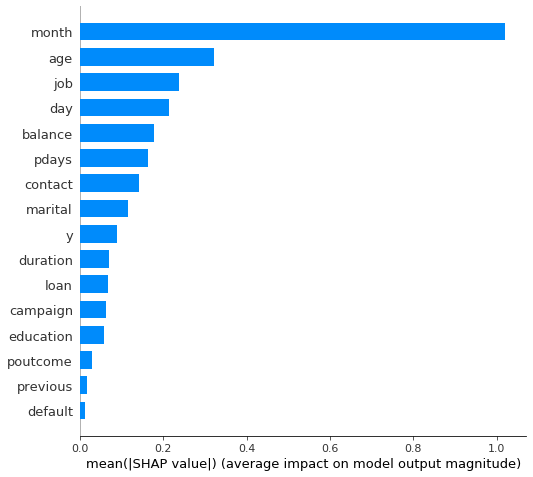

In [41]:
shap.summary_plot(shap_values[1], X_housing, plot_type="bar")

Olhando as características pessoais mais proeminentes dos clientes que possuem empréstimo imobiliário, consideradas pelo modelo, podemos ver que são a idade e o emprego

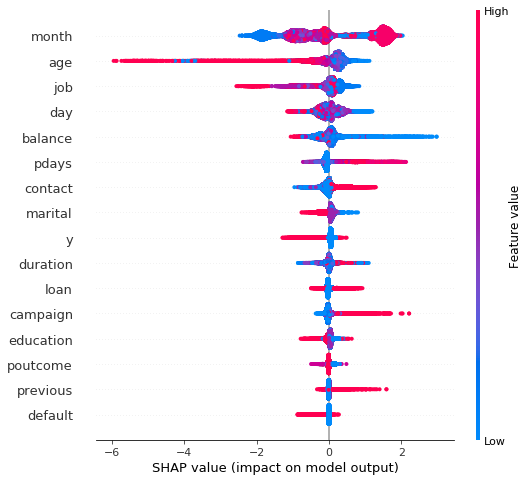

In [42]:
shap.summary_plot(shap_values[1], X_housing)

Os clientes que tem maiores idades tendem a serem classificados como não tendo empréstimo imobiliário, e com menores idades como tendo. Isso acontece devido a provavelmente as pessoas com mais idade já terem quitado a dívida de sua casa.

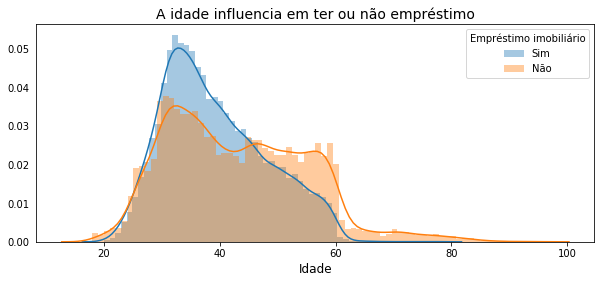

In [43]:
# Gero a figura definindo um tamanho e um título
plt.figure(figsize=(10,4))
plt.title('A idade influencia em ter ou não empréstimo', fontsize=14)

# Plots de distribuição de idade para pessoas que tem e não tem empréstimo imobiliário
sns.distplot(df.loc[df.housing=='yes']['age'].values, bins=59,  label='Sim')
sns.distplot(df.loc[df.housing=='no']['age'].values, bins=76, label='Não')

# Adicionando a legenda da figura e o rótulo de X
plt.legend(loc='upper right', borderaxespad=0.5, title = 'Empréstimo imobiliário')
plt.xlabel('Idade', fontsize=12)

plt.show()

Entre as pessoas que tem empréstimo imobiliário, há um pico na idade próxima a 30 anos, depois começa a cair o numero de pessoas até chegar a quase 0 próximo aos 60 anos. Entre as pessoas que não tem empréstimo imobiliário, a idade está mais distribuída

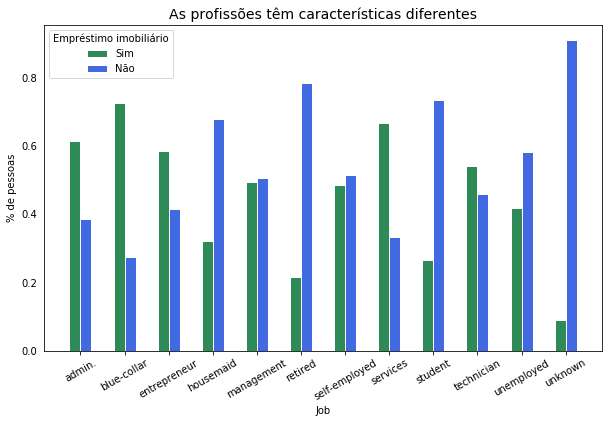

In [44]:
# Gero a figura definindo um tamanho e um título
plt.figure(figsize=(10,6))
plt.title('As profissões têm características diferentes', fontsize=14)

# largura das barras
barWidth = 0.25
 
# Altura das barras (calculei a porcentagem de pessoas que tem e que não tem empréstimo por profissão)
bars1 = df.loc[df.housing=='yes'].job.value_counts().div(df.job.value_counts()).values
bars2 = df.loc[df.housing=='no'].job.value_counts().div(df.job.value_counts()).values
 
# Posição da barra no eixo X
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Plots
plt.bar(r1, bars1, color='seagreen', width=barWidth, edgecolor='white', label='Sim')
plt.bar(r2, bars2, color='royalblue', width=barWidth, edgecolor='white', label='Não')
 
# Adicionando rótulos nas barras
plt.xlabel('Job')
plt.ylabel('% de pessoas')
plt.xticks([r + barWidth/2 for r in range(len(bars1))],
           df.loc[df.housing=='no'].job.value_counts().div(df.job.value_counts()).index.values)
plt.xticks(rotation=30)

# Adicionando a legenda da figura e o rótulo de X
plt.legend(loc='upper left', borderaxespad=0.5, title = 'Empréstimo imobiliário')
plt.show()

O emprego é uma característica proeminente de um cliente que possue empréstimo imobiliário. São poucos empregos que tem valores balanceados entre ter ou não ter empréstimo imobiliário como por exemplo os empregos de gestão, autônomos e técnicos. Já os empregos de administração, "blue-collar", serviços e empreendedores tem mais pessoas que possuem empréstimo imobiliário. Os clientes que tem a maior chance de não ter o empréstimo são os que tem emprego desconhecido, os estudantes, os aposentados e os empregados domésticos.

Podemos chegar a conclusão de que as características mais proeminentes de um cliente que possua empréstimo imobiliário são ter uma idade entre 30 a 40 anos, e trabalhar como administrador, "blue-collar", empreendedor, ou no setor de serviços.